# **Importing libraries**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Scraping the data**

In [ ]:
os.makedirs("data", exist_ok=True)

base_url = "https://www.airlinequality.com/airline-reviews/british-airways/"
pages = 20
page_size = 100
reviews = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    for div in soup.find_all("div", class_="text_content"):
        reviews.append(div.get_text().strip())

df = pd.DataFrame({'reviews': reviews})
df.to_csv("data/British_Airways_Reviews.csv", index=False)

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20


# **Loading the data and preprocessing**

In [ ]:
#Data inputting
data = pd.read_csv("/content/data/British_Airways_Reviews.csv")
data.head(10)

,reviews
0,Not Verified | Paid to upgrade to business cl...
1,Not Verified | Decided to use point to upgrad...
2,✅ Trip Verified | Mumbai check in is not so ...
3,✅ Trip Verified | BA First lounge at T5 very...
4,✅ Trip Verified | Terrible experience. No re...
5,✅ Trip Verified | I know BA often comes under ...
6,✅ Trip Verified | My recent experience with...
7,Not Verified | This recent long-haul experien...
8,✅ Trip Verified | Check-in was slow with onl...
9,Not Verified | Check in was smooth enough. Bo...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [ ]:
data.isnull().sum()

,0
reviews,0


In [ ]:
#Get the number of verified and unverified trips and reviews
def get_trip_status(reviews):
    if '✅ Trip Verified' in reviews:
        return 'Verified_Trips'
    elif 'Not Verified' in reviews:
        return 'Not Verified_Trips'
    elif '✅ Verified Review' in reviews:
        return 'Verified_Reviews'
    else:
      return 'Unverified_Reviews'

data['trip_status'] = data['reviews'].apply(get_trip_status)
data['trip_status'].value_counts()

,count
trip_status,
Verified_Trips,1334
Verified_Reviews,359
Not Verified_Trips,301
Unverified_Reviews,6


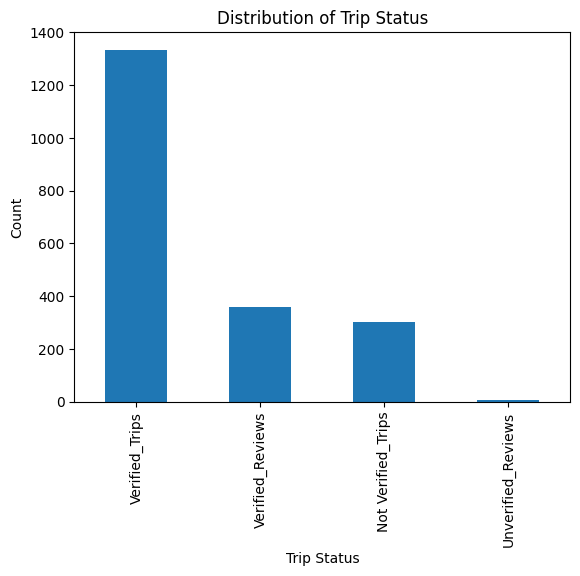

In [ ]:
data['trip_status'].value_counts().plot(kind='bar')
plt.xlabel('Trip Status')
plt.ylabel('Count')
plt.title('Distribution of Trip Status')
plt.show()

In [ ]:
# Removing the  emojis and extracting the  trip status from review text
data['reviews'] = data['reviews'].str.replace(r"(✅|❎)", "", regex=True)
data[['trip_status', 'review_text']] = data['reviews'].str.split('|', n=1, expand=True)
data['trip_status'] = data['trip_status'].str.strip()
data['review_text'] = data['review_text'].str.strip()

data.drop(columns=['reviews'], inplace=True)

data.to_csv("data/Updated_British_Airways_Reviews.csv", index=False)

In [ ]:
df = pd.read_csv("/content/data/Updated_British_Airways_Reviews.csv")
df.head()

,trip_status,review_text
0,Not Verified,Paid to upgrade to business class as family of...
1,Not Verified,Decided to use point to upgrade to business af...
2,Trip Verified,Mumbai check in is not so helpful. I asked to ...
3,Trip Verified,BA First lounge at T5 very busy as usual. Flig...
4,Trip Verified,Terrible experience. No respect to priority bo...


# **Text Cleaning**

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", str(text))  # remove special characters
    text = text.lower().strip()  # lowercase and strip
    text = " ".join([word for word in text.split() if word not in stop_words])  # remove stopwords
    return text

df['cleaned_reviews'] = df['review_text'].apply(clean_text)

df.to_csv("data/Cleaned_British_Airways_Reviews.csv", index=False)

df.head()


,trip_status,review_text,cleaned_reviews
0,Not Verified,Paid to upgrade to business class as family of...,paid upgrade business class family disappointe...
1,Not Verified,Decided to use point to upgrade to business af...,decided use point upgrade business visiting fa...
2,Trip Verified,Mumbai check in is not so helpful. I asked to ...,mumbai check helpful asked put alaska frequent...
3,Trip Verified,BA First lounge at T5 very busy as usual. Flig...,ba first lounge busy usual flight departed ear...
4,Trip Verified,Terrible experience. No respect to priority bo...,terrible experience respect priority boarding ...


# POS Tagging

In [ ]:
from nltk import word_tokenize, pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
def pos_tagg(text):
  tokens = word_tokenize(text)
  return pos_tag(tokens)
df['pos_tagged'] = df['cleaned_reviews'].apply(pos_tagg)
df.head()

,trip_status,review_text,cleaned_reviews,pos_tagged
0,Not Verified,Paid to upgrade to business class as family of...,paid upgrade business class family disappointe...,"[(paid, VBN), (upgrade, JJ), (business, NN), (..."
1,Not Verified,Decided to use point to upgrade to business af...,decided use point upgrade business visiting fa...,"[(decided, VBN), (use, NN), (point, NN), (upgr..."
2,Trip Verified,Mumbai check in is not so helpful. I asked to ...,mumbai check helpful asked put alaska frequent...,"[(mumbai, RB), (check, VB), (helpful, JJ), (as..."
3,Trip Verified,BA First lounge at T5 very busy as usual. Flig...,ba first lounge busy usual flight departed ear...,"[(ba, NN), (first, RB), (lounge, JJ), (busy, J..."
4,Trip Verified,Terrible experience. No respect to priority bo...,terrible experience respect priority boarding ...,"[(terrible, JJ), (experience, NN), (respect, N..."


# Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
# Converting NLTK POS tags ('JJ', 'VB', 'NN', 'RB') into the WordNet's lemmatizer (wordnet.ADJ, wordnet.VERB) format.
def get_wordnet_pos(tag):
  if tag.startswith('J'):
    return wordnet.ADJ
  elif tag.startswith('V'):
     return wordnet.VERB
  elif tag.startswith('N'):
    return wordnet.NOUN
  elif tag.startswith('R'):
    return wordnet.ADV
  else:
    return None

# Taking a list of word,tag pairs from the data from the pos_tagged column and performing lemmatization
def lemmatize_pos_tag(data):
  lemmatized_text = []
  for word,tag in data:
    w_tag = get_wordnet_pos(tag)
    if w_tag:
        lemmatized_word = lemmatizer.lemmatize(word, w_tag)
    else:
        lemmatized_word = word
    lemmatized_text.append(lemmatized_word)
  return " ".join(lemmatized_text)

df['lemmatized_text'] = df['pos_tagged'].apply(lemmatize_pos_tag)

df.head()

,trip_status,review_text,cleaned_reviews,pos_tagged,lemmatized_text
0,Not Verified,Paid to upgrade to business class as family of...,paid upgrade business class family disappointe...,"[(paid, VBN), (upgrade, JJ), (business, NN), (...",pay upgrade business class family disappoint a...
1,Not Verified,Decided to use point to upgrade to business af...,decided use point upgrade business visiting fa...,"[(decided, VBN), (use, NN), (point, NN), (upgr...",decide use point upgrade business visit family...
2,Trip Verified,Mumbai check in is not so helpful. I asked to ...,mumbai check helpful asked put alaska frequent...,"[(mumbai, RB), (check, VB), (helpful, JJ), (as...",mumbai check helpful ask put alaska frequent f...
3,Trip Verified,BA First lounge at T5 very busy as usual. Flig...,ba first lounge busy usual flight departed ear...,"[(ba, NN), (first, RB), (lounge, JJ), (busy, J...",ba first lounge busy usual flight depart early...
4,Trip Verified,Terrible experience. No respect to priority bo...,terrible experience respect priority boarding ...,"[(terrible, JJ), (experience, NN), (respect, N...",terrible experience respect priority board cro...


# **Sentiment Analysis**

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
df['sentiment_score'] = df['lemmatized_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

def get_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(get_sentiment_label)

df.to_csv("data/British_Airways_Reviews_with_Sentiment.csv", index=False)

df.head(5)


,trip_status,review_text,cleaned_reviews,pos_tagged,lemmatized_text,sentiment_score,sentiment_label
0,Not Verified,Paid to upgrade to business class as family of...,paid upgrade business class family disappointe...,"[(paid, VBN), (upgrade, JJ), (business, NN), (...",pay upgrade business class family disappoint a...,0.8451,Positive
1,Not Verified,Decided to use point to upgrade to business af...,decided use point upgrade business visiting fa...,"[(decided, VBN), (use, NN), (point, NN), (upgr...",decide use point upgrade business visit family...,0.9732,Positive
2,Trip Verified,Mumbai check in is not so helpful. I asked to ...,mumbai check helpful asked put alaska frequent...,"[(mumbai, RB), (check, VB), (helpful, JJ), (as...",mumbai check helpful ask put alaska frequent f...,-0.1027,Negative
3,Trip Verified,BA First lounge at T5 very busy as usual. Flig...,ba first lounge busy usual flight departed ear...,"[(ba, NN), (first, RB), (lounge, JJ), (busy, J...",ba first lounge busy usual flight depart early...,0.6597,Positive
4,Trip Verified,Terrible experience. No respect to priority bo...,terrible experience respect priority boarding ...,"[(terrible, JJ), (experience, NN), (respect, N...",terrible experience respect priority board cro...,0.0000,Neutral


In [ ]:
df.isnull().sum()

,0
trip_status,0
review_text,1
cleaned_reviews,0
pos_tagged,0
lemmatized_text,0
sentiment_score,0
sentiment_label,0


In [ ]:
df= df.dropna(subset=["review_text"])
df= df[df['review_text'].str.strip()!=""]

/tmp/ipython-input-33-3714547502.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', palette='viridis')


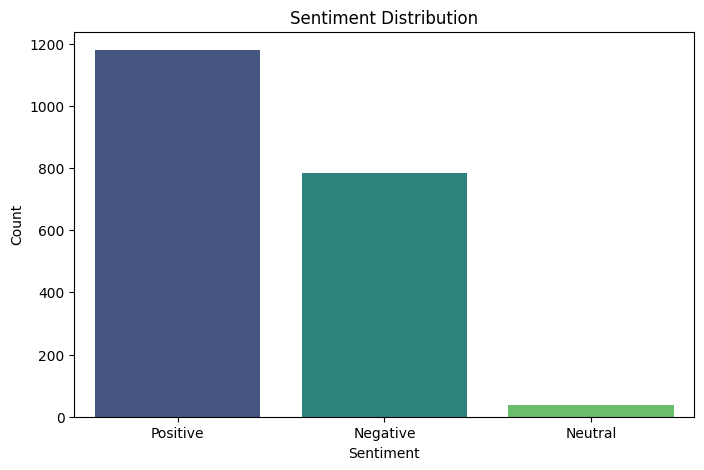

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment_label', palette='viridis')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

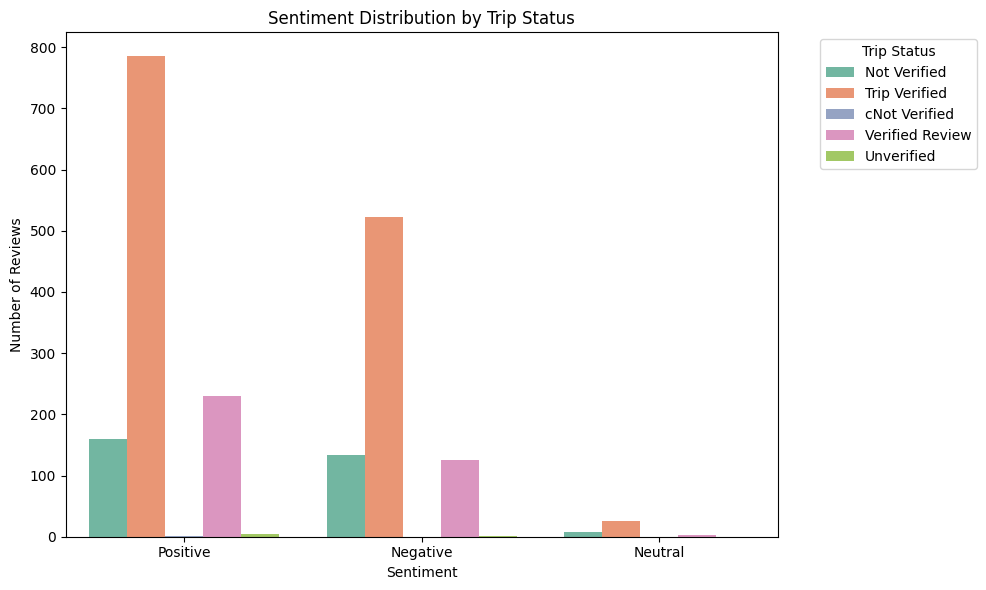

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment_label', hue='trip_status', palette='Set2')


plt.title('Sentiment Distribution by Trip Status')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.legend(title='Trip Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
df.isnull().sum()

,0
trip_status,0
review_text,0
cleaned_reviews,0
pos_tagged,0
lemmatized_text,0
sentiment_score,0
sentiment_label,0



Step 3: Creating Word Cloud before cleaning...


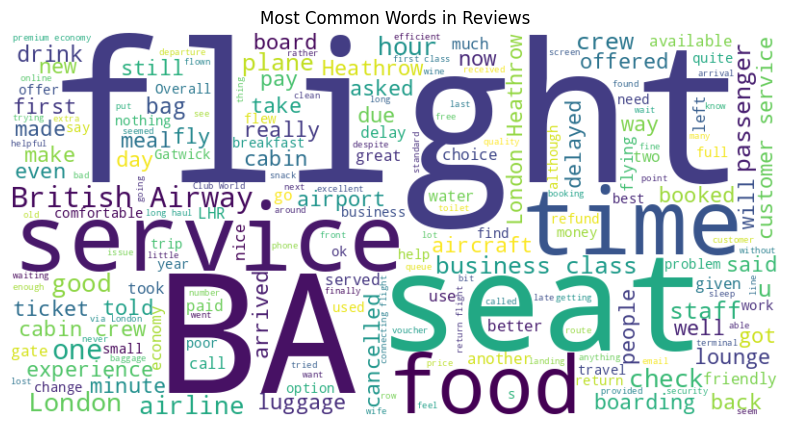

In [ ]:
# Word Cloud Visualization
print("\nStep 3: Creating Word Cloud before cleaning...")
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['review_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Reviews")
plt.show()




Step 3: Creating Word Cloud after cleaning...


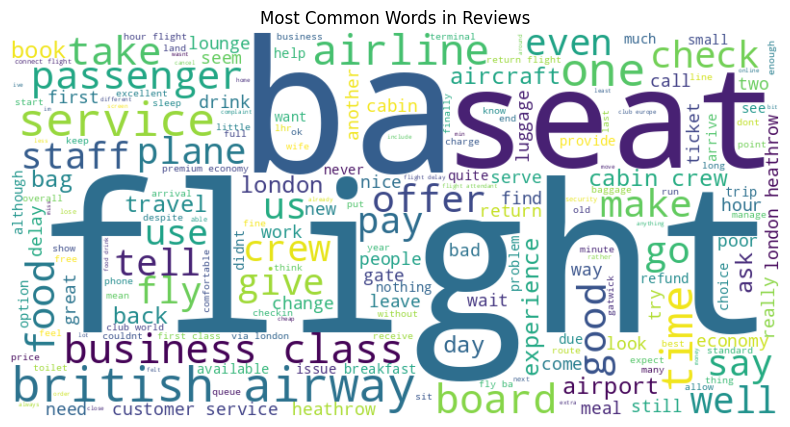

In [ ]:
print("\nStep 3: Creating Word Cloud after cleaning...")
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['lemmatized_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Reviews")
plt.show()

# **TOPIC MODELLING**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['lemmatized_text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

print("\nTop Words in Topics:")
words = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"\nTopic {idx + 1}:")
    print([words[i] for i in topic.argsort()[-10:]])



Top Words in Topics:

Topic 1:
['fly', 'airway', 'british', 'london', 'premium', 'flight', 'business', 'class', 'economy', 'seat']

Topic 2:
['staff', 'use', 'airline', 'book', 'service', 'fly', 'pay', 'seat', 'flight', 'ba']

Topic 3:
['service', 'london', 'tell', 'day', 'customer', 'airway', 'british', 'ba', 'hour', 'flight']

Topic 4:
['meal', 'class', 'london', 'cabin', 'food', 'crew', 'service', 'seat', 'ba', 'flight']

Topic 5:
['club', 'seat', 'ba', 'food', 'lounge', 'crew', 'board', 'time', 'good', 'flight']


In [ ]:
topic_values = lda.transform(X)

df['dominant_topic'] = topic_values.argmax(axis=1)# GETTING THE DOMINANT TOPICS
df.head(5)

,trip_status,review_text,cleaned_reviews,pos_tagged,lemmatized_text,sentiment_score,sentiment_label,dominant_topic
0,Not Verified,Paid to upgrade to business class as family of...,paid upgrade business class family disappointe...,"[(paid, VBN), (upgrade, JJ), (business, NN), (...",pay upgrade business class family disappoint a...,0.8451,Positive,0
1,Not Verified,Decided to use point to upgrade to business af...,decided use point upgrade business visiting fa...,"[(decided, VBN), (use, NN), (point, NN), (upgr...",decide use point upgrade business visit family...,0.9732,Positive,3
2,Trip Verified,Mumbai check in is not so helpful. I asked to ...,mumbai check helpful asked put alaska frequent...,"[(mumbai, RB), (check, VB), (helpful, JJ), (as...",mumbai check helpful ask put alaska frequent f...,-0.1027,Negative,0
3,Trip Verified,BA First lounge at T5 very busy as usual. Flig...,ba first lounge busy usual flight departed ear...,"[(ba, NN), (first, RB), (lounge, JJ), (busy, J...",ba first lounge busy usual flight depart early...,0.6597,Positive,4
4,Trip Verified,Terrible experience. No respect to priority bo...,terrible experience respect priority boarding ...,"[(terrible, JJ), (experience, NN), (respect, N...",terrible experience respect priority board cro...,0.0000,Neutral,4


/tmp/ipython-input-42-3567041047.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df, x='dominant_topic', y='sentiment_score_label', palette='coolwarm')


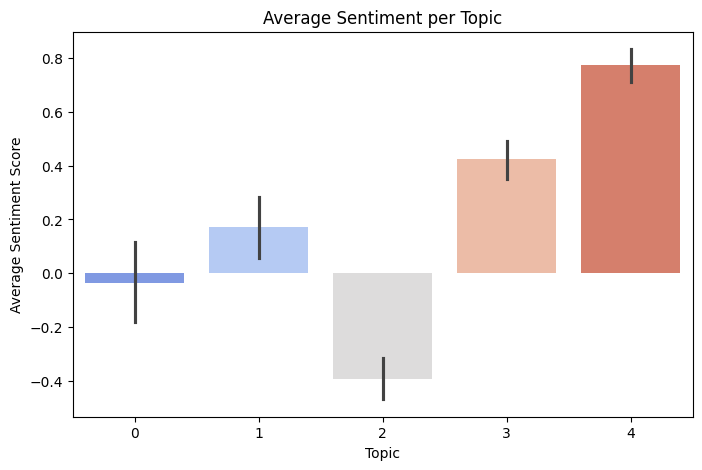

In [ ]:
# Converting the  sentiment to numerical score
sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['sentiment_score_label'] = df['sentiment_label'].map(sentiment_map)

plt.figure(figsize=(8, 5))
sns.barplot(data= df, x='dominant_topic', y='sentiment_score_label', palette='coolwarm')
plt.title("Average Sentiment per Topic")
plt.xlabel("Topic")
plt.ylabel("Average Sentiment Score")
plt.show()


The x axis shows the 5 different topics and the y axis shows the average sentiment score for each topic ranging from -1 to 1.

Topic 4: Strongly positive (~0.8)

Topic 3: Moderately positive (~0.4)

Topic 1: Slightly positive (~0.17)

Topic 0: Neutral (~0.0)

Topic 2: Negative (~-0.4)

Error bars(Black):
Show variation in sentiment within each topic — longer bars = more spread.